<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 2

## 🌻 Welcome to Chapter 2, "Biases and Data Augmentation"


In this chapter, we’ll cover the following primary topics. 

- Computational Biases 

- Human Biases 

- Systemic Biases 

- Deep Dive to Image Augmentation Biases 

- Deep Dive to Text Augmentation Biases 

## Set up: Bring back Pluto

### ✋ STOP

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.



### GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 65 (delta 18), reused 30 (delta 3), pack-reused 0
Unpacking objects: 100% (65/65), done.


### Fetch file from URL

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [ ]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [ ]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

- Wake up Pluto

In [3]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_1.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PackTDataAug'> Class: PackTDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [4]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/08/29 03:46
                    Platform : linux
       Python version (3.7+) : 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
     PyTorch version (1.11+) : 1.12.1+cu113
     Pandas version (1.3.5+) : 1.3.5
        PIL version (9.0.0+) : 7.1.2
 Matplotlib version (3.2.2+) : 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


- Copy the Pluto chapter 1 to begin chapter 2

In [5]:
pluto_chapter_2 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
!cp {pluto_file} {pluto_chapter_2}

# Fetch Kaggle Data

In [6]:
# %write -a {pluto_chapter_2}

# easy method to download kaggle data files
!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22


### Define Kaggle Download Functions

✋ STOP

- Sign up on kaggle.com and get username ad key

In [7]:
@add_method(PackTDataAug)
def remember_kaggle_access_keys(self,username,key):
  self.kaggle_username = username
  self.kaggle_key = key
  return

In [8]:
pluto.remember_kaggle_access_keys("duchaba", "0c737c90feacb5c56232b0d7c24e8664")

In [9]:
@add_method(PackTDataAug)
def _write_kaggle_credit(self):
  creds = '{"username":"'+self.kaggle_username+'","key":"'+self.kaggle_key+'"}'
  kdirs = ["~/.kaggle/kaggle.json", "./kaggle.json"]
  #
  for k in kdirs:
    cred_path = pathlib.Path(k).expanduser()
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)
  import kaggle
  #
  return
#
@add_method(PackTDataAug)
def fetch_kaggle_comp_data(self,cname):
  self._write_kaggle_credit()
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return
#
#
@add_method(PackTDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  self._write_kaggle_credit()
  opendatasets.download(url,data_dir=dest)
  return

In [10]:
pluto._write_kaggle_credit()

### Fetch and display State Farm Kaggle competition data

In [11]:
import kaggle
import zipfile
import os

In [12]:
kaggle_competition_name = "state-farm-distracted-driver-detection"
pluto.fetch_kaggle_comp_data(kaggle_competition_name)

100%|██████████| 4.00G/4.00G [00:28<00:00, 150MB/s]


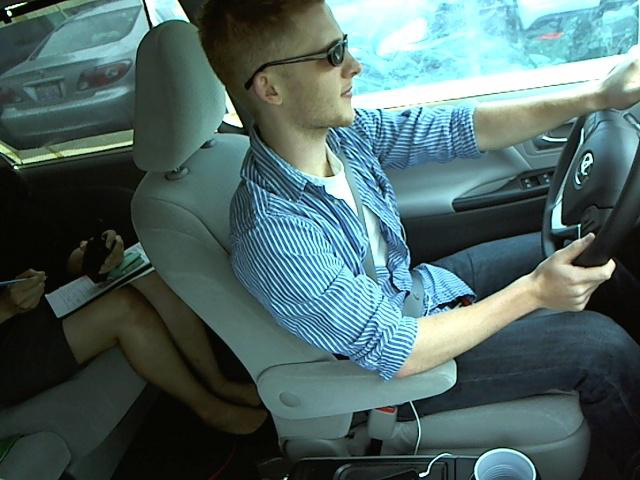

In [13]:
# quick view one image
f = 'state-farm-distracted-driver-detection/imgs/train/c0/img_100026.jpg'
img = PIL.Image.open(f)
display(img)

### Convert to Pandas DataFrame

In [14]:
@add_method(PackTDataAug)
def fetch_df(self, csv):
  df = pandas.read_csv(csv)
  return df

In [15]:
f = 'state-farm-distracted-driver-detection/driver_imgs_list.csv'
pluto.df_sf_data = pluto.fetch_df(f)
pluto.df_sf_data.tail(3)

subject classname            img
22421    p081        c9  img_25946.jpg
22422    p081        c9  img_67850.jpg
22423    p081        c9   img_9684.jpg

In [16]:
pluto.df_sf_data.describe()

subject classname            img
count    22424     22424          22424
unique      26        10          22424
top       p021        c0  img_44733.jpg
freq      1237      2489              1

In [17]:
@add_method(PackTDataAug)
def build_sf_fname(self, df):
  root = 'state-farm-distracted-driver-detection/imgs/train/'
  df["fname"] = root + df.classname + '/' + df.img
  return

In [18]:
pluto.build_sf_fname(pluto.df_sf_data)
pluto.df_sf_data.head(3)

subject classname            img  \
0    p002        c0  img_44733.jpg   
1    p002        c0  img_72999.jpg   
2    p002        c0  img_25094.jpg   

                                               fname  
0  state-farm-distracted-driver-detection/imgs/tr...  
1  state-farm-distracted-driver-detection/imgs/tr...  
2  state-farm-distracted-driver-detection/imgs/tr...

- Verify the fname is correct

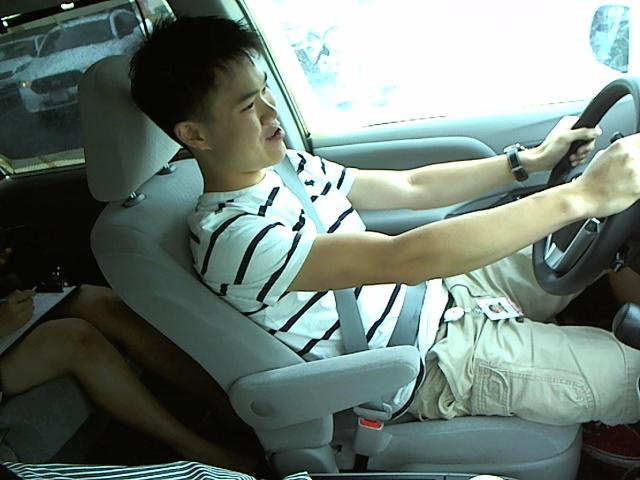

In [19]:
img = PIL.Image.open(pluto.df_sf_data.fname[0])
display(img)

# Draw the Images

In [20]:
# set internal counter for image to be zero, e.g. pluto0.jpg, pluto1.jpg, etc.
pluto.fname_id = 0

In [21]:
#
@add_method(PackTDataAug)
def _drop_image(self,canvas, fname=None,format=".jpg",dname="Data-Augmentation-with-Python/pluto_img"):
  if (fname is None):
    self.fname_id += 1
    if not os.path.exists(dname):
      os.makedirs(dname)
    fn = dname + "/pluto" + str(self.fname_id) + format
  else:
    fn = fname
  canvas.savefig(fn, cmap="Greys", bbox_inches="tight", pad_inches=0.25)
  return
#
@add_method(PackTDataAug)
def draw_batch(self,df_filenames, disp_max=10,is_shuffle=False, figsize=(16,8)):
  disp_col = 5
  disp_row = int(numpy.round((disp_max/disp_col)+0.4, 0))
  _fns = list(df_filenames)
  if (is_shuffle):
    numpy.random.shuffle(_fns)
  k = 0
  clean_fns = []
  if (len(_fns) >= disp_max):
    canvas, pic = matplotlib.pyplot.subplots(disp_row,disp_col, figsize=figsize)
    for i in range(disp_row):
      for j in range(disp_col):
        try:
          im = PIL.Image.open(_fns[k])
          pic[i][j].imshow(im)
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
          clean_fns.append(_fns[k])
        except:
          pic[i][j].set_title(pathlib.Path(_fns[k]).name)
        k += 1
    canvas.tight_layout()
    self._drop_image(canvas)
    canvas.show()
  else:
    print("**Warning: the length should be more then ", disp_max, ". The given length: ", len(_fns))
  return clean_fns

## State Farm

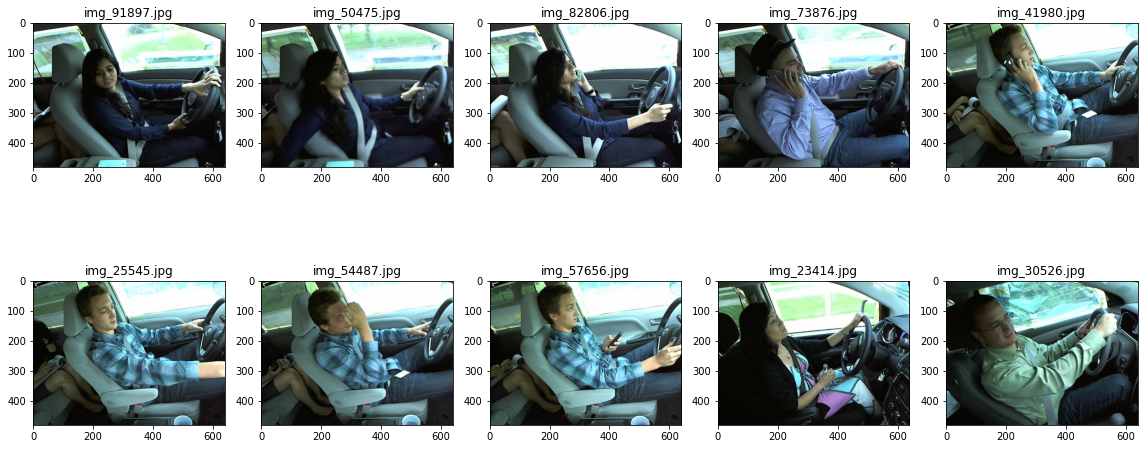

In [22]:
x = pluto.draw_batch(pluto.df_sf_data["fname"], is_shuffle=True)

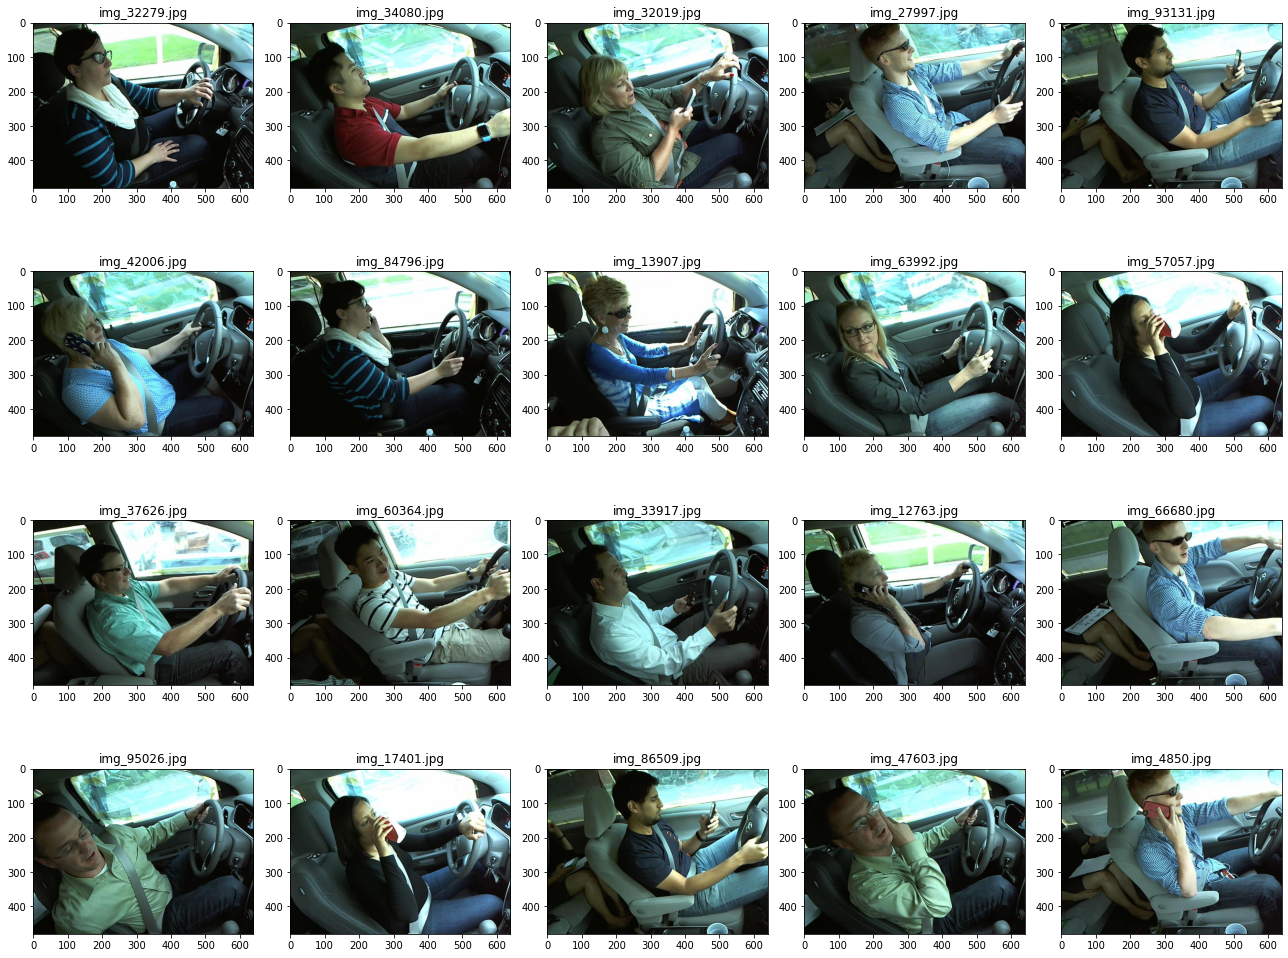

In [23]:
x = pluto.draw_batch(pluto.df_sf_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

## Nike Shoe

- For Nike, Adidas and Converse Shoes Images

In [24]:
url = 'https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 15.6M/15.6M [00:00<00:00, 86.0MB/s]

In [25]:
import os
#
@add_method(PackTDataAug)
def build_shoe_fname(self, start_path):
  df = pandas.DataFrame()
  for root, dirs, files in os.walk(start_path, topdown=False):
   for name in files:
      f = os.path.join(root, name)
      p = pathlib.Path(f).parent.name 
      d = pandas.DataFrame({'fname': [f], 'label': [p]})
      df = df.append(d, ignore_index=True)
  #
  # clean it up
  df = df.reset_index(drop=True)
  return df

In [26]:
f = 'kaggle/nike-adidas-and-converse-imaged/train'
pluto.df_shoe_data = pluto.build_shoe_fname(f)
pluto.df_shoe_data.head(3)

fname label
0  kaggle/nike-adidas-and-converse-imaged/train/n...  nike
1  kaggle/nike-adidas-and-converse-imaged/train/n...  nike
2  kaggle/nike-adidas-and-converse-imaged/train/n...  nike

In [27]:
pluto.df_shoe_data.tail(3)

fname   label
708  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas
709  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas
710  kaggle/nike-adidas-and-converse-imaged/train/a...  adidas

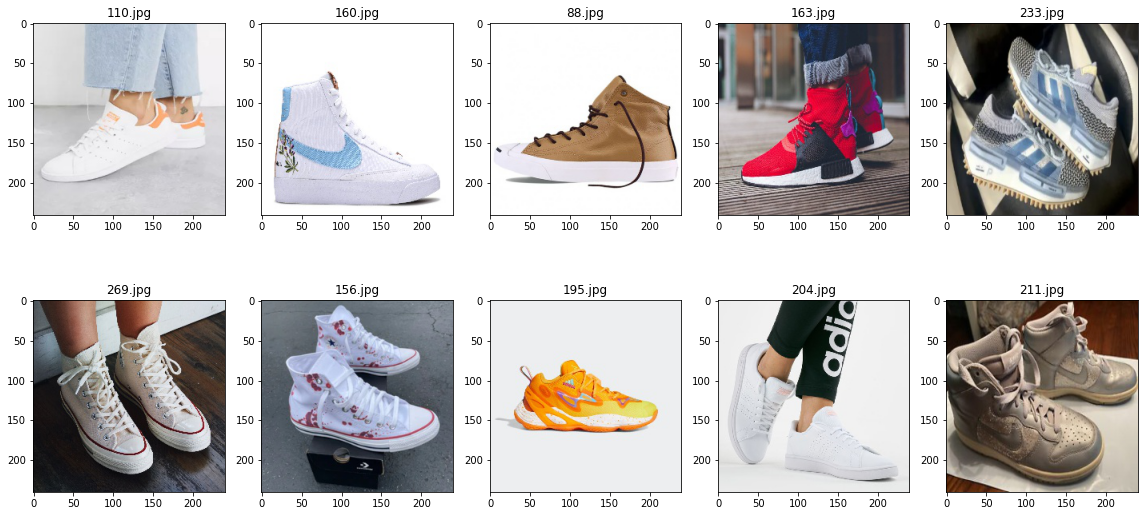

In [28]:
x = pluto.draw_batch(pluto.df_shoe_data["fname"], is_shuffle=True)

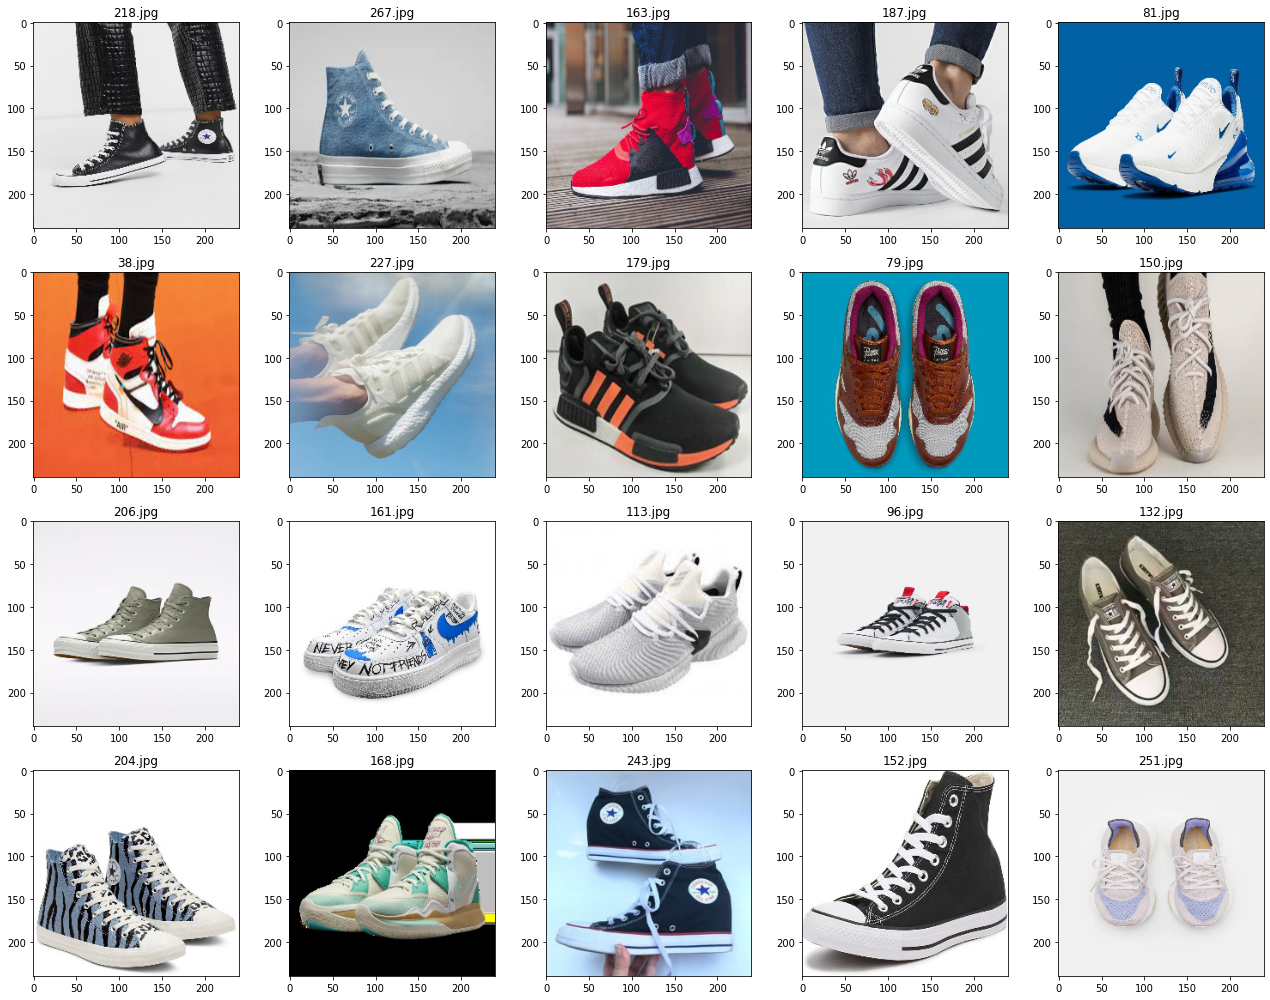

In [29]:
x = pluto.draw_batch(pluto.df_shoe_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

## Grapevine Images

In [30]:
#
%%time
url = "https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset"
pluto.fetch_kaggle_dataset(url)

100%|██████████| 109M/109M [00:01<00:00, 97.9MB/s]



CPU times: user 1.1 s, sys: 485 ms, total: 1.58 s
Wall time: 3.05 s


In [31]:
!ls -la kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset

total 32
drwxr-xr-x 7 root root 4096 Aug 29 03:50 .
drwxr-xr-x 3 root root 4096 Aug 29 03:50 ..
drwxr-xr-x 2 root root 4096 Aug 29 03:50 Ak
drwxr-xr-x 2 root root 4096 Aug 29 03:50 Ala_Idris
drwxr-xr-x 2 root root 4096 Aug 29 03:50 Buzgulu
drwxr-xr-x 2 root root 4096 Aug 29 03:50 Dimnit
-rw-r--r-- 1 root root 2608 Aug 29 03:50 Grapevine_Leaves_Image_Dataset_Citation_Request.txt
drwxr-xr-x 2 root root 4096 Aug 29 03:50 Nazli


In [32]:
f = '/content/kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ak'
!ls -la {f} | head

total 20888
drwxr-xr-x 2 root root   4096 Aug 29 03:50 .
drwxr-xr-x 7 root root   4096 Aug 29 03:50 ..
-rw-r--r-- 1 root root 204438 Aug 29 03:50 Ak (100).png
-rw-r--r-- 1 root root 120623 Aug 29 03:50 Ak (10).png
-rw-r--r-- 1 root root 320960 Aug 29 03:50 Ak (11).png
-rw-r--r-- 1 root root 113495 Aug 29 03:50 Ak (12).png
-rw-r--r-- 1 root root 283302 Aug 29 03:50 Ak (13).png
-rw-r--r-- 1 root root 111328 Aug 29 03:50 Ak (14).png
-rw-r--r-- 1 root root 230239 Aug 29 03:50 Ak (15).png


- remove all space in file name

In [33]:
# run this until no error/output
f2 = '/content/kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset'
!find {f2} -name "* *" -type f | rename 's/ /_/g'

In [34]:
!ls -la {f} | head

total 20888
drwxr-xr-x 2 root root   4096 Aug 29 03:50 .
drwxr-xr-x 7 root root   4096 Aug 29 03:50 ..
-rw-r--r-- 1 root root 204438 Aug 29 03:50 Ak_(100).png
-rw-r--r-- 1 root root 120623 Aug 29 03:50 Ak_(10).png
-rw-r--r-- 1 root root 320960 Aug 29 03:50 Ak_(11).png
-rw-r--r-- 1 root root 113495 Aug 29 03:50 Ak_(12).png
-rw-r--r-- 1 root root 283302 Aug 29 03:50 Ak_(13).png
-rw-r--r-- 1 root root 111328 Aug 29 03:50 Ak_(14).png
-rw-r--r-- 1 root root 230239 Aug 29 03:50 Ak_(15).png


In [ ]:
f = 'kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt'
!cat {f}

In [36]:
!mv {f} .

- The grapevine image structure is the same as the shoe image.
  - folder name is the label
  - the images are in their respected folder
  - No csv file

In [37]:
f = 'kaggle/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset'
pluto.df_grapevine_data = pluto.build_shoe_fname(f)
pluto.df_grapevine_data.head(3)

fname label
0  kaggle/grapevine-leaves-image-dataset/Grapevin...    Ak
1  kaggle/grapevine-leaves-image-dataset/Grapevin...    Ak
2  kaggle/grapevine-leaves-image-dataset/Grapevin...    Ak

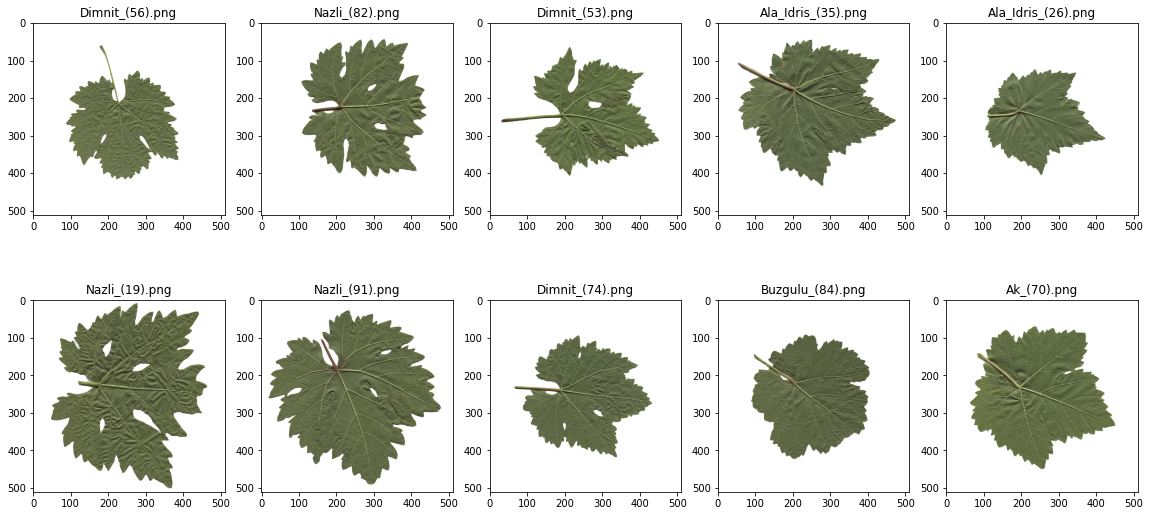

In [38]:
x = pluto.draw_batch(pluto.df_grapevine_data["fname"], is_shuffle=True)

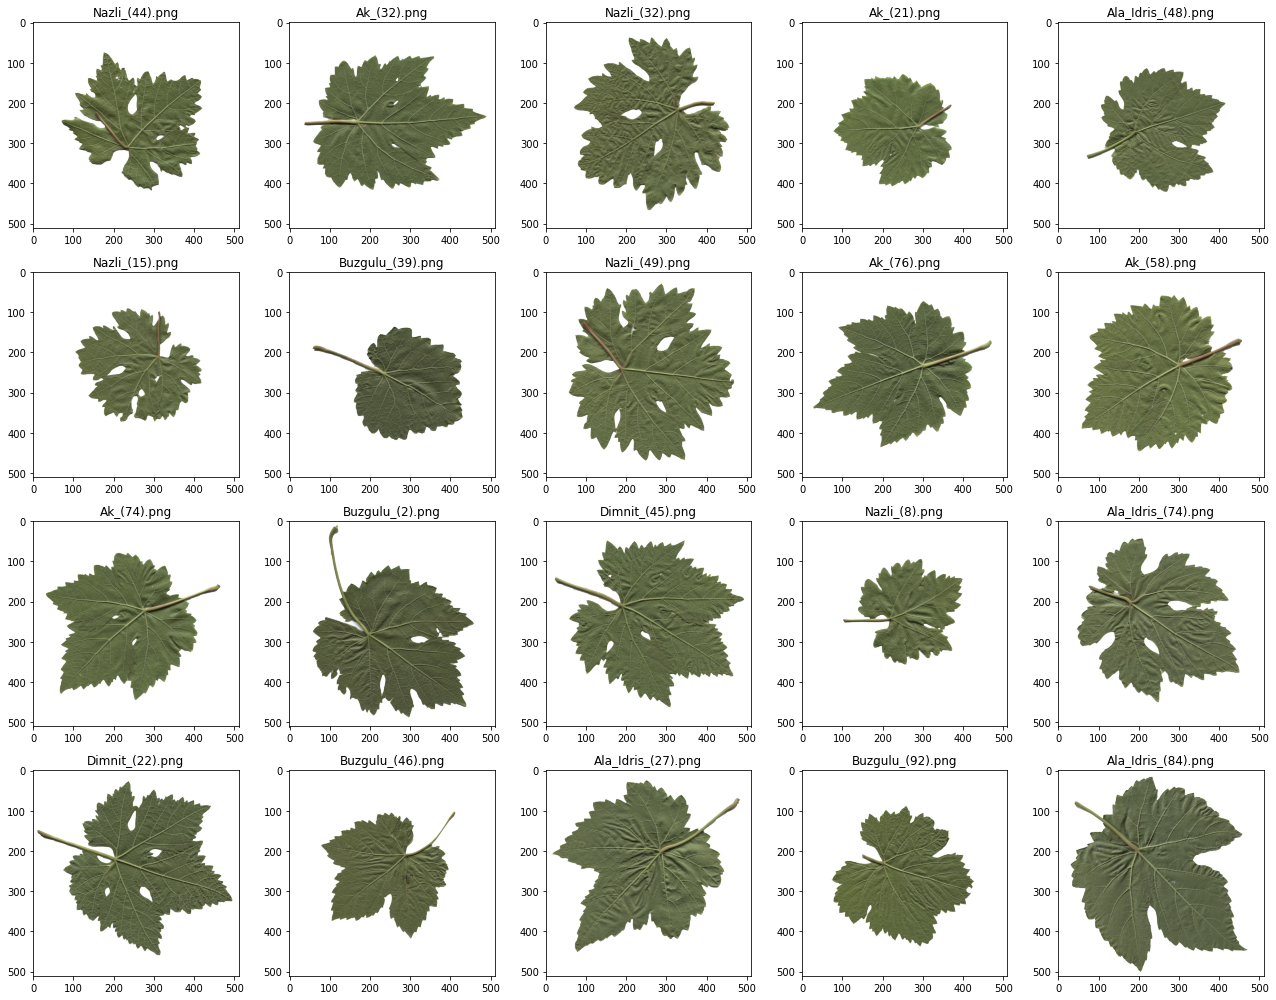

In [39]:
x = pluto.draw_batch(pluto.df_grapevine_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

# Monkeypox (optional for Notebook only)

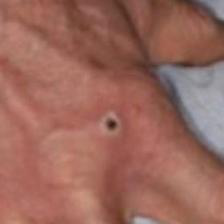

In [ ]:
# quick view one image
f = 'kaggle/monkeypox-skin-lesion-dataset/Original Images/Original Images/Monkey Pox/M01_03.jpg'
img = PIL.Image.open(f)
display(img)

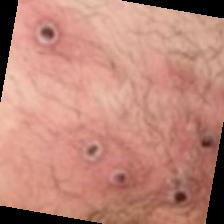

In [ ]:
f = 'kaggle/monkeypox-skin-lesion-dataset/Augmented Images/Augmented Images/Monkeypox_augmented/M01_01_02.jpg'
img = PIL.Image.open(f)
display(img)

In [ ]:
f = 'kaggle/monkeypox-skin-lesion-dataset/Monkeypox_Dataset_metadata.csv'
pluto.df_monkey_data = pluto.fetch_df(f)
pluto.df_monkey_data.tail(3)

ImageID          Label
225  NM108_01  Non Monkeypox
226  NM109_01  Non Monkeypox
227  NM110_01  Non Monkeypox

- Run this until No error
- 3 times for monkeypox 

In [ ]:
!find . -name "* *" -type d | rename 's/ /_/g'

In [ ]:
@add_method(PackTDataAug)
def build_monkey_fname(self, df):
  url_monkey = 'kaggle/monkeypox-skin-lesion-dataset/Original_Images/Original_Images/Monkey_Pox/'
  url_other = 'kaggle/monkeypox-skin-lesion-dataset/Original_Images/Original_Images/Others/'
  df["fname"] = url_monkey + df.ImageID + ".jpg"
  # quick replace other
  df.loc[df['Label'] == 'Non Monkeypox', 'fname'] = url_other + df.ImageID + ".jpg"
  return


In [ ]:
pluto.build_monkey_fname(pluto.df_monkey_data)
pluto.df_monkey_data.head(3)

ImageID      Label                                              fname
0  M01_01  Monkeypox  kaggle/monkeypox-skin-lesion-dataset/Original_...
1  M01_02  Monkeypox  kaggle/monkeypox-skin-lesion-dataset/Original_...
2  M01_03  Monkeypox  kaggle/monkeypox-skin-lesion-dataset/Original_...

In [ ]:
pluto.df_monkey_data.tail(3)

ImageID          Label  \
225  NM108_01  Non Monkeypox   
226  NM109_01  Non Monkeypox   
227  NM110_01  Non Monkeypox   

                                                 fname  
225  kaggle/monkeypox-skin-lesion-dataset/Original_...  
226  kaggle/monkeypox-skin-lesion-dataset/Original_...  
227  kaggle/monkeypox-skin-lesion-dataset/Original_...

- Draw it

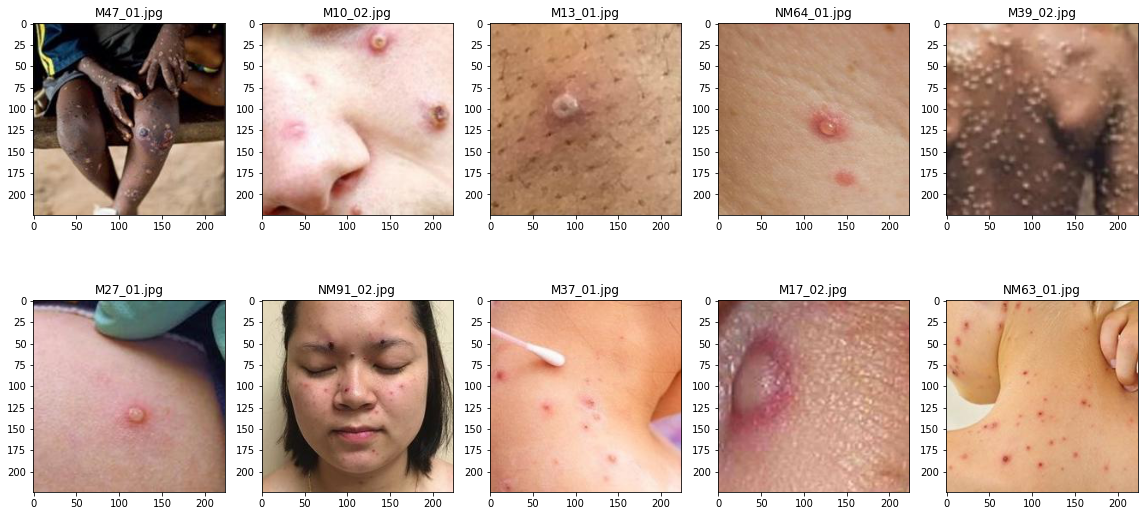

In [ ]:
x = pluto.draw_batch(pluto.df_monkey_data["fname"], is_shuffle=True)

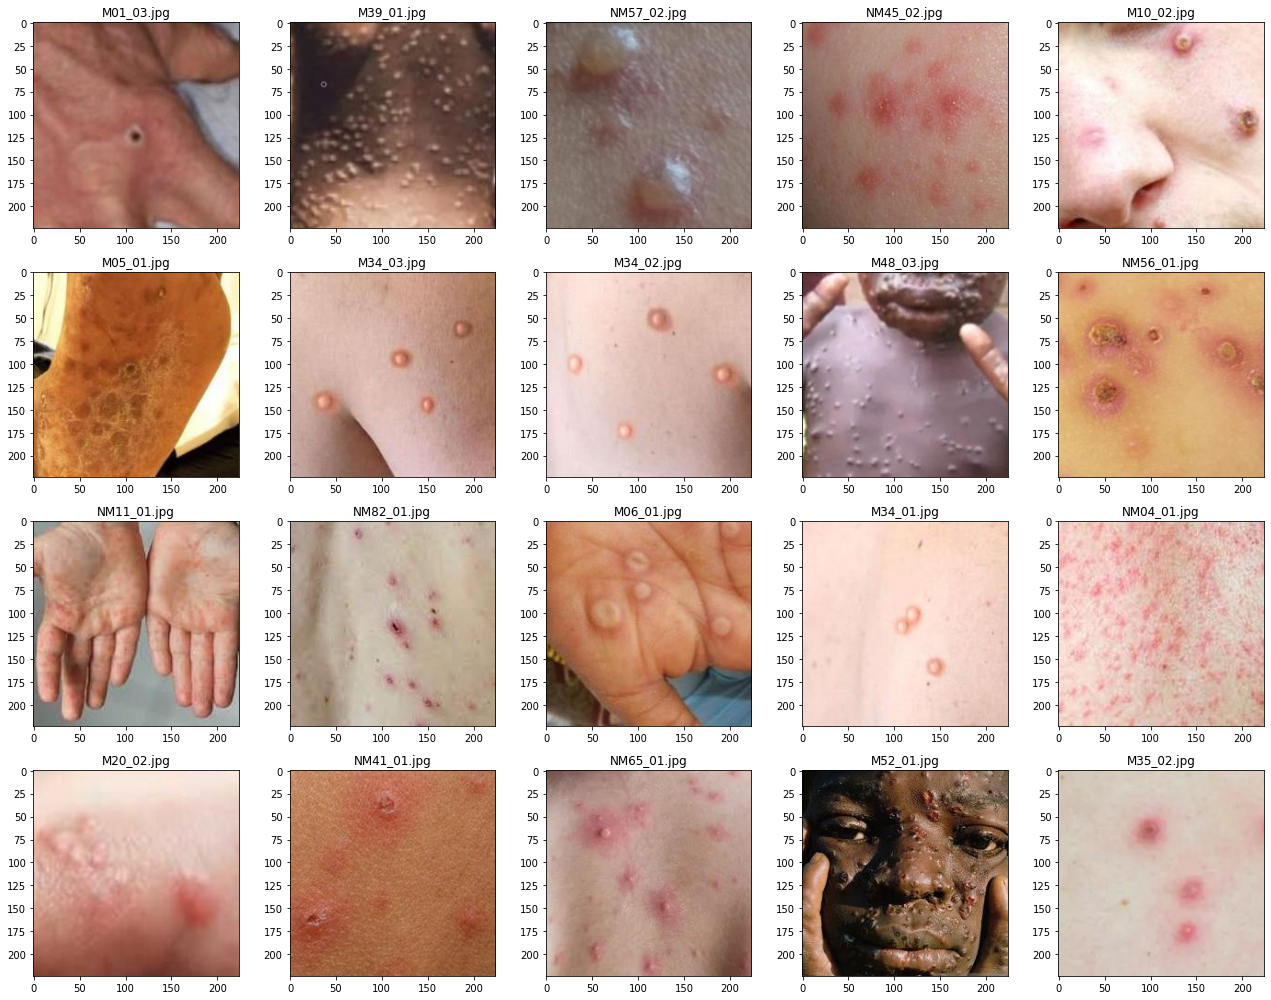

In [ ]:
x = pluto.draw_batch(pluto.df_monkey_data["fname"], is_shuffle=True,disp_max=20,figsize=(18,14))

# NLP (Text) data

## NetFlix

In [40]:
%%time
url = 'https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.34M/1.34M [00:00<00:00, 88.7MB/s]


CPU times: user 72.8 ms, sys: 19.5 ms, total: 92.3 ms
Wall time: 545 ms


In [41]:
f = 'kaggle/dataset-netflix-shows/netflix_titles.csv'
pluto.df_netflix_data = pluto.fetch_df(f)
pluto.df_netflix_data.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [42]:
print(pluto.df_netflix_data.description[0])

As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.


In [43]:
pluto.df_netflix_data.tail(3)

show_id   type       title         director  \
8804   s8805  Movie  Zombieland  Ruben Fleischer   
8805   s8806  Movie        Zoom     Peter Hewitt   
8806   s8807  Movie      Zubaan      Mozez Singh   

                                                   cast        country  \
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

            date_added  release_year rating duration  \
8804  November 1, 2019          2009      R   88 min   
8805  January 11, 2020          2006     PG   88 min   
8806     March 2, 2019          2015  TV-14  111 min   

                                           listed_in  \
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [44]:
pluto.df_netflix_data.description.describe()

count                                                  8807
unique                                                 8775
top       Paranormal activity at a lush, abandoned prope...
freq                                                      4
Name: description, dtype: object

In [45]:
import textwrap

In [46]:
print(textwrap.fill(pluto.df_netflix_data.description[0], 80))

As her father nears the end of his life, filmmaker Kirsten Johnson stages his
death in inventive and comical ways to help them both face the inevitable.


In [58]:
@add_method(PackTDataAug)
def draw_batch_text(self,df_text, disp_max=10,is_shuffle=False):
  df = pandas.DataFrame(df_text.copy())
  with pandas.option_context("display.max_colwidth", None):
    display(df.sample(disp_max))
  return


In [59]:
pluto.draw_batch_text(pluto.df_netflix_data.description)

description
5102     Injury and family push hockey player Doug Glatt into retirement, but his plans change when his beloved former team appoints his nemesis as captain.
4932        British comedian Greg Davies revisits terrifying dates, manscaping disasters, his father's pranks and more in a savagely funny stand-up special.
6811        David Attenborough journeys to both polar regions to investigate what rising temperatures will mean for the people and wildlife that live there.
3598    As Metropolis High students, super teens Wonder Woman, Supergirl, Bumblebee, Batgirl, Zatanna, and Green Lantern fight crime, classwork and crushes.
4864                          Struggling writer Wally Spivak is stuck in a rut – until he meets an engaged couple and starts to see life in a whole new way.
804    A census taker sent to investigate why Rockwell Falls has had the same population, 436, for more than a century, soon wishes he hadn't taken the job.
7331           A teenager with a beautiful voice becomes a pop star but discovers she has powers that come from a magical realm where she's a lost princess.
6843         Tired of dealing with boyfriends who wrong them, gal pals Lauren, Emily and Andrea decide to turn the tables and become the players themselves.
2569      This reality series enters the worlds of compulsive hoarders, whose addiction to acquisition overwhelms not just their homes but also their lives.
3914  Juggling personal predicaments and workplace woes, three buddies and bandmates practice for their ultimate dream: winning a coveted music competition.

In [61]:
pluto.draw_batch_text(pluto.df_netflix_data.description)

description
2217   Five Mafia families ruled New York with a bloody fist in the 1970s and '80s, until a group of federal agents tried the unthinkable: taking them down.
2687       An aspiring fashion designer's life is transformed after she discovers she’s the heiress of a billion-dollar empire left by her estranged father.
4219         When a teenager is transported back to his parents’ high school days, he has the chance to alter the events that led to their unhappy marriage.
8411         Documentary crew members brave Earth's most frigid regions to capture the majesty and mystery found in the chillier side of the animal kingdom.
4733  A con man uncovers a deadly secret and must save his lady love, the little girl who insists she's his daughter and the small-town locals from the mob.
3670        In a dystopian tale unfolding in reverse chronology, a man with a complicated past takes revenge on the individuals who wronged him decades ago.
5449        Two college frenemies whose lives aren't what they hoped meet up decades later and escalate their resentments from verbal jabs to bloody brawls.
1567     Three gay siblings are told by their terminally ill father that they must each produce a grandchild in order to inherit their share of his fortune.
5142     When a teenager discovers he's not really human, he ventures out to a remote island to explore his roots and confronts a series of wild challenges.
8567      Jiang Chen-bo is a loser without prospects for success, until a surprise promotion becomes the catalyst for his entire family's upturn in fortune.

In [53]:
with pandas.option_context("display.max_colwidth", None):
  display(df.sample(10))

description
4328  A gangster hires goon Teefa to abduct his friend’s daughter for an arranged marriage, but things get tricky when Teefa develops feelings for the girl.
1393      A former violinist grows suspicious of the new people in her life and their alarming behavior as she recovers from an assault that left her blind.
8511  Director David Fincher's biographical drama chronicles the meteoric rise of Facebook CEO Mark Zuckerberg from Harvard sophomore to Internet superstar.
4686                          In this low-budget short film, two best buddies meet up for a night of booze-fueled fun before one of them moves to Vancouver.
4950                   Stand-up comedian John Mulaney tackles such red-hot topics as quicksand, Motown singers and an elderly man he once met in a bathroom.
2926    Grizzly, Panda and Ice Bear are three adopted bear brothers struggling against their animal instincts to fit into the civilized, modern human world.
5063   The world's greatest feline fighter, lover and milk connoisseur takes on daring adventures in exotic locations in this family-friendly comedy series.
7996         Unable to bribe his way out of a reckless driving charge, an arrogant rich kid is sentenced to community service at a home for senior citizens.
3115     Dreaming of a better life, an imperiled prostitute crosses paths with a wealthy company heir who’s been transformed into a child by his evil uncle.
6838          With the help of brainy and adventurous sidekicks, New Mouse City's favorite journalist investigates mysteries that take him around the world,

In [64]:
df['wordc'] = df.description.apply(lambda x: len(x.split()))


In [65]:
df

description  wordc
0     As her father nears the end of his life, filmm...     27
1     After crossing paths at a party, a Cape Town t...     27
2     To protect his family from a powerful drug lor...     27
3     Feuds, flirtations and toilet talk go down amo...     24
4     In a city of coaching centers known to train I...     24
...                                                 ...    ...
8802  A political cartoonist, a crime reporter and a...     25
8803  While living alone in a spooky town, a young g...     20
8804  Looking to survive in a world taken over by zo...     25
8805  Dragged from civilian life, a former superhero...     26
8806  A scrappy but poor boy worms his way into a ty...     25

[8807 rows x 2 columns]

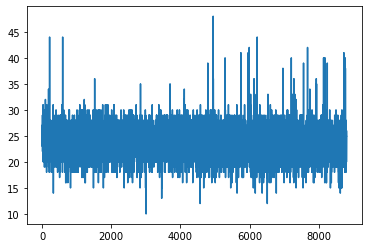

In [66]:
df.wordc.plot()

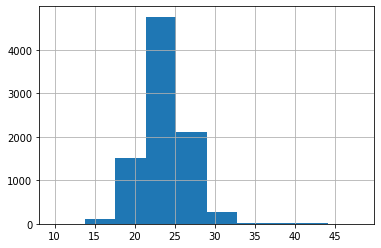

In [67]:
df.wordc.hist()

In [69]:
df.sort_values(by=['wordc'], inplace=True)

In [71]:
df

description  wordc
3007  A detective interrogates a monkey who is suspe...     10
4570  Interconnected sketches and performances skewe...     12
6513  Masterful detectives utilize forensic science ...     12
3458  Eight undocumented families' fates roller-coas...     13
6774  Familial bonds strain as dramas concerning lov...     14
...                                                 ...    ...
5990  In the age of the Ming Dynasty, Quinglong is t...     42
215   Based on a true story, this action film follow...     44
593   When a snow day shuts down the whole town, the...     44
6221  Half-dog, half-wolf Balto (voiced by Maurice L...     44
4948  An Indian village is abuzz with news that a ma...     48

[8807 rows x 2 columns]

In [72]:
df = df.reset_index(drop=True)
df

description  wordc
0     A detective interrogates a monkey who is suspe...     10
1     Interconnected sketches and performances skewe...     12
2     Masterful detectives utilize forensic science ...     12
3     Eight undocumented families' fates roller-coas...     13
4     Familial bonds strain as dramas concerning lov...     14
...                                                 ...    ...
8802  In the age of the Ming Dynasty, Quinglong is t...     42
8803  Based on a true story, this action film follow...     44
8804  When a snow day shuts down the whole town, the...     44
8805  Half-dog, half-wolf Balto (voiced by Maurice L...     44
8806  An Indian village is abuzz with news that a ma...     48

[8807 rows x 2 columns]

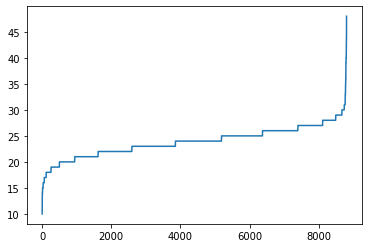

In [75]:
df.wordc.plot()

## Amazon review

In [ ]:
%%time
url = 'https://www.kaggle.com/datasets/tarkkaanko/amazon'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 582k/582k [00:00<00:00, 74.4MB/s]


CPU times: user 49.6 ms, sys: 9.28 ms, total: 58.9 ms
Wall time: 736 ms


In [ ]:
f = 'kaggle/amazon/amazon_reviews.csv'
pluto.df_amazon_data = pluto.fetch_df(f)
pluto.df_amazon_data.head(3)

Unnamed: 0 reviewerName  overall  \
0           0          NaN      4.0   
1           1         0mie      5.0   
2           2          1K3      4.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   

   score_average_rating  wilson_lower_bound  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0

In [ ]:
print(pluto.df_amazon_data.reviewText[1])

Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.


In [ ]:
print(textwrap.fill(pluto.df_amazon_data.reviewText[1], 80))

Purchased this for my device, it worked as advertised. You can never have too
much phone memory, since I download a lot of stuff this was a no brainer for me.


## BBC

In [ ]:
f = 'https://www.kaggle.com/datasets/pariza/bbc-news-summary'

In [ ]:
f = 'https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification'

# Push up all changes

- username: duchaba

- password: [use the token]

In [ ]:
f = '/content/Data-Augmentation-with-Python'
!git -C {f} add -a
!git -C {f} commit -m "end of session"

In [ ]:
!git -C {f} push

# Summary

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- I wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.



In [ ]:
!pip install colab-xterm
%load_ext colabxterm
%xterm